Training using Word Embedding and Using LSTM Layers 

In [0]:
from keras.layers import Embedding
from keras.datasets import imdb
from keras import preprocessing


In [20]:
max_features = 10000
maxlen = 200
batch_size = 64

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('input_train shape:', x_train.shape)
print('input_test shape:', x_test.shape)

25000 train sequences
25000 test sequences
input_train shape: (25000, 200)
input_test shape: (25000, 200)


In [21]:
x_train


array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

In [22]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Embedding(10000, 64, input_length=maxlen))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 200, 64)           640000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                409632    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,049,665
Trainable params: 1,049,665
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 3s 137us/step - loss: 0.4

Adding learing rate

In [23]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.optimizers import adam

model = Sequential()
model.add(Embedding(max_features, 64, input_length=maxlen))

model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

train_history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=256,
                    validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 200, 64)           640000    
_________________________________________________________________
flatten_4 (Flatten)          (None, 12800)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                409632    
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 33        
Total params: 1,049,665
Trainable params: 1,049,665
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 65us/step - loss: 0.69

Test Loss:  0.31511781105041503
Test Accuracy 0.86752
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


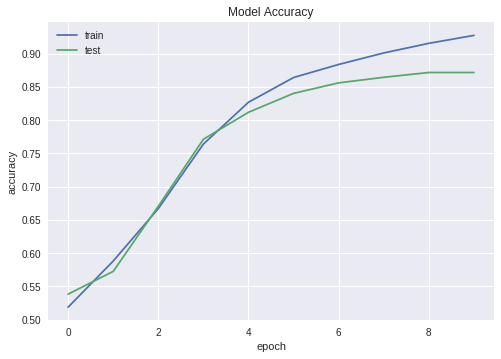

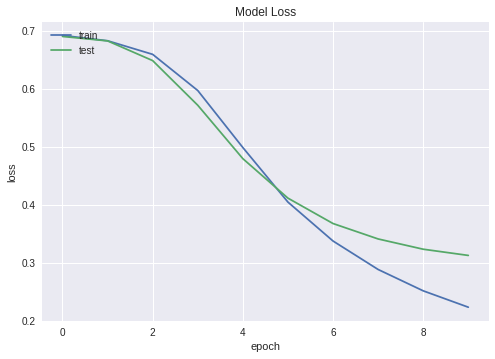

In [24]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

score = model.evaluate(x_test, y_test, verbose=3)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(train_history.history.keys())
# summarize history for accuracy
plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [25]:
#SImple RNN model 
from keras.layers import Dense, SimpleRNN

model_sr = Sequential()
model_sr.add(Embedding(max_features, 32))
model_sr.add(SimpleRNN(32))
model_sr.add(Dense(1, activation='sigmoid'))

model_sr.compile(optimizer=adam(0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history = model_sr.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.6666 - acc: 0.5806 - val_loss: 0.5795 - val_acc: 0.7254
Epoch 2/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.5014 - acc: 0.7830 - val_loss: 0.4654 - val_acc: 0.8088
Epoch 3/10
20000/20000 [==============================] - 30s 2ms/step - loss: 0.4016 - acc: 0.8429 - val_loss: 0.4218 - val_acc: 0.8242
Epoch 4/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.3411 - acc: 0.8717 - val_loss: 0.3823 - val_acc: 0.8438
Epoch 5/10
20000/20000 [==============================] - 30s 2ms/step - loss: 0.2946 - acc: 0.8912 - val_loss: 0.3737 - val_acc: 0.8422
Epoch 6/10
20000/20000 [==============================] - 30s 2ms/step - loss: 0.2520 - acc: 0.9138 - val_loss: 0.3661 - val_acc: 0.8492
Epoch 7/10
20000/20000 [==============================] - 31s 2ms/step - loss: 0.2202 - acc: 0.9270 - val_loss: 0.3623 - val_acc:

Test Loss:  0.37954836071014403
Test Accuracy 0.84692
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


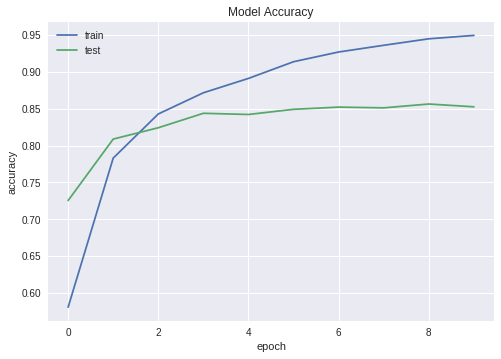

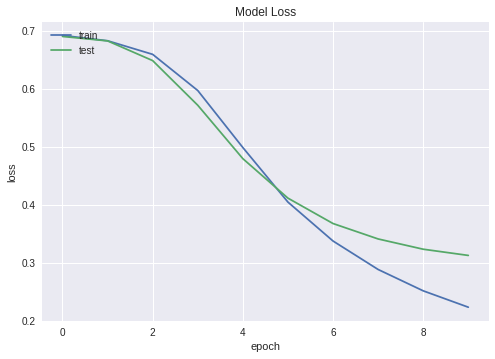

In [26]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

score = model_sr.evaluate(x_test, y_test, verbose=3)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
y_pred = model_sr.predict_classes(x_test)

In [28]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[10732,  1768],
       [ 2059, 10441]])

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.84      0.85     12500

   micro avg       0.85      0.85      0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

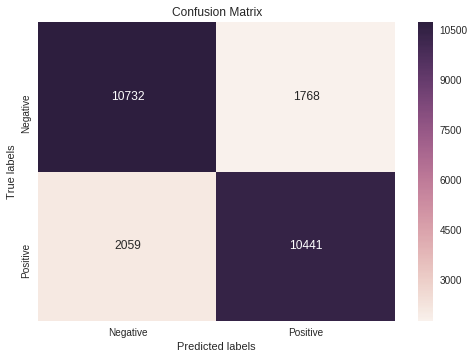

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
#cm = classification_report(y_test, y_pred_lstm)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

**STACKED** **LSTM** 

In [35]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 64))
model_lstm.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
#model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))

model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer=adam(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model_lstm.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 256s 13ms/step - loss: 0.6676 - acc: 0.6006 - val_loss: 0.5039 - val_acc: 0.7766
Epoch 2/10
20000/20000 [==============================] - 255s 13ms/step - loss: 0.4531 - acc: 0.8010 - val_loss: 0.4109 - val_acc: 0.8192
Epoch 3/10
20000/20000 [==============================] - 253s 13ms/step - loss: 0.3728 - acc: 0.8487 - val_loss: 0.3881 - val_acc: 0.8340
Epoch 4/10
20000/20000 [==============================] - 253s 13ms/step - loss: 0.3384 - acc: 0.8649 - val_loss: 0.3805 - val_acc: 0.8360
Epoch 5/10
20000/20000 [==============================] - 253s 13ms/step - loss: 0.3131 - acc: 0.8774 - val_loss: 0.3693 - val_acc: 0.8442
Epoch 6/10
20000/20000 [==============================] - 256s 13ms/step - loss: 0.2849 - acc: 0.8916 - val_loss: 0.3725 - val_acc: 0.8440
Epoch 7/10
20000/20000 [==============================] - 252s 13ms/step - loss: 0.2644 - acc: 0.9003 - val_loss: 0.3

Test Loss:  0.40192584995269776
Test Accuracy 0.8354
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


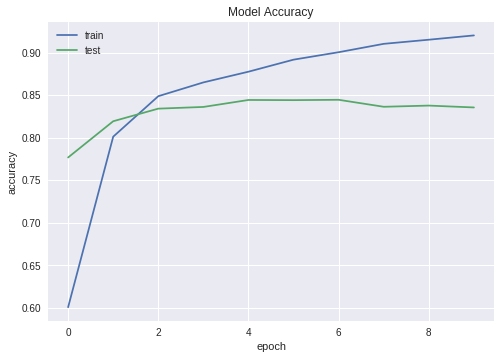

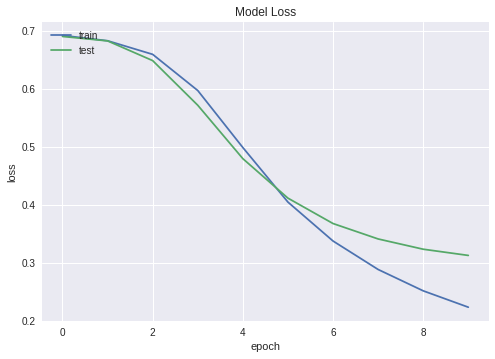

In [36]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

score = model_lstm.evaluate(x_test, y_test, verbose=3)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [37]:
y_pred_lstm = model.predict_classes(x_test)
y_pred_lstm 

array([[0],
       [1],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_lstm)

array([[10656,  1844],
       [ 1468, 11032]])

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lstm))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     12500
           1       0.86      0.88      0.87     12500

   micro avg       0.87      0.87      0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

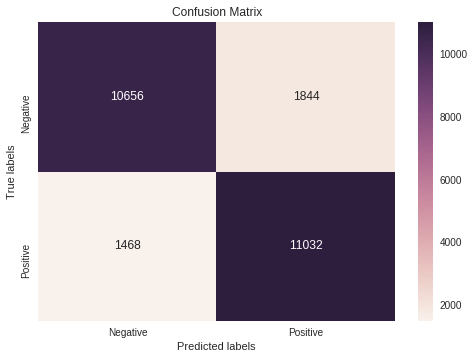

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
#cm = classification_report(y_test, y_pred_lstm)
sns.heatmap(confusion_matrix(y_test, y_pred_lstm), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

**BIDIRECTIONAL** **GRU**

In [0]:
from keras.layers import SpatialDropout1D, Bidirectional
from keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D,GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional

In [70]:
max_features = 10000
maxlen = 200
batch_size = 64

model_GRU = Sequential()

model_GRU.add(Embedding(max_features, 64, input_length=maxlen))
model_GRU.add(SpatialDropout1D(0.25))
model_GRU.add(Bidirectional(GRU(100)))
model_GRU.add(Dropout(0.25))

model_GRU.add(Dense(1, activation='sigmoid'))
model_GRU.compile(loss='binary_crossentropy', optimizer=adam(lr=0.0004), metrics=['accuracy'])
model_GRU.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 200, 64)           640000    
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 200, 64)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 200)               99000     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 201       
Total params: 739,201
Trainable params: 739,201
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model_GRU.fit(x_train, y_train,
                    epochs=5,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 233s 12ms/step - loss: 0.5053 - acc: 0.7238 - val_loss: 0.3138 - val_acc: 0.8684
Epoch 2/5
20000/20000 [==============================] - 228s 11ms/step - loss: 0.2624 - acc: 0.8957 - val_loss: 0.3170 - val_acc: 0.8752
Epoch 3/5
20000/20000 [==============================] - 227s 11ms/step - loss: 0.2046 - acc: 0.9224 - val_loss: 0.3110 - val_acc: 0.8768
Epoch 4/5
20000/20000 [==============================] - 227s 11ms/step - loss: 0.1621 - acc: 0.9405 - val_loss: 0.3456 - val_acc: 0.8724
Epoch 5/5
20000/20000 [==============================] - 231s 12ms/step - loss: 0.1352 - acc: 0.9518 - val_loss: 0.3772 - val_acc: 0.8754


Test Loss:  0.5497311110496521
Test Accuracy 0.8486
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


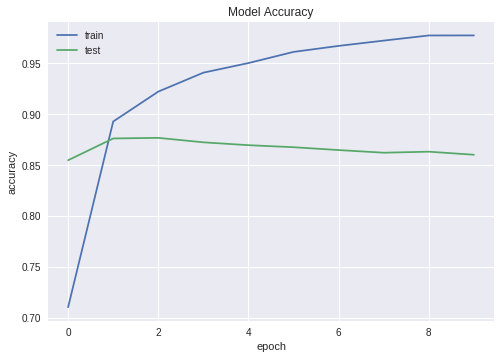

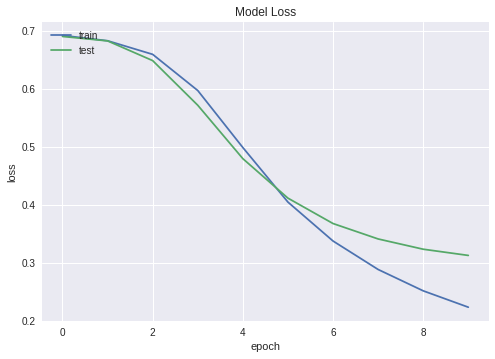

In [44]:
import matplotlib.pyplot as plt
#print(metrics.accuracy_score(Y_test, Y_predicted))

score = model_GRU.evaluate(x_test, y_test, verbose=3)
print('Test Loss: ', score[0])
print('Test Accuracy', score[1])


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [45]:
y_pred_GRU = model_GRU.predict_classes(x_test)
y_pred_GRU 

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [1]], dtype=int32)

In [46]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred_GRU))

0.8486


In [47]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_GRU)

array([[10623,  1877],
       [ 1908, 10592]])

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_GRU))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12500
           1       0.85      0.85      0.85     12500

   micro avg       0.85      0.85      0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

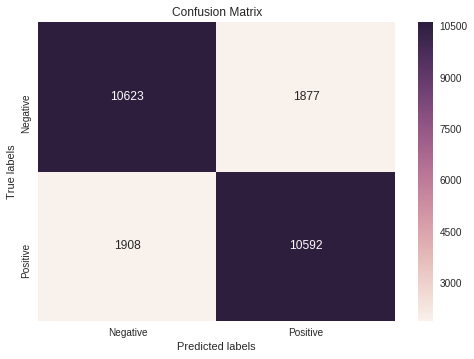

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_GRU), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

Predicting the Best model on GE Dataset

In [0]:
import nltk
import string
import numpy as np
import pandas as pd

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
transcript_GE = pd.read_json('/content/drive/My Drive/Cognitive Data Colab/GE_Earnings_Transcript.json')

  
#Remove all the columns with Neutral Sentiment 
transcript_GE = transcript_GE[transcript_GE['sentiment'] != 'Neutral']
transcript_GE.head()

,sentiment,text
100,Negative,"Well Steve, I'd like to think that everything ..."
101,Negative,"With respect to Baker Hughes, I mean we talked..."
102,Negative,Thanks. And just as a follow-up. I didn't have...
107,Negative,Morning. Maybe as the first question on Power....
108,Negative,"Sure, sure. Let me do that and again this is v..."


In [53]:
  
#Remove all the columns with Neutral Sentiment 
transcript_GE = transcript_GE[transcript_GE['sentiment'] != 'Neutral']
transcript_GE.head()

,sentiment,text
100,Negative,"Well Steve, I'd like to think that everything ..."
101,Negative,"With respect to Baker Hughes, I mean we talked..."
102,Negative,Thanks. And just as a follow-up. I didn't have...
107,Negative,Morning. Maybe as the first question on Power....
108,Negative,"Sure, sure. Let me do that and again this is v..."


In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_le = le.fit_transform(transcript_GE['sentiment'])
Y_le

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [0]:
import pandas as pd 
import keras
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize

vocabulary_size = 10000
tokenizer = Tokenizer(num_words= vocabulary_size)
tokenizer.fit_on_texts(transcript_GE['text'])

In [0]:
sequences = tokenizer.texts_to_sequences(transcript_GE['text'])
data = pad_sequences(sequences, maxlen=150)

In [58]:
X_tra_GE = data
X_tra_GE

array([[  0,   0,   0, ...,  26,  31, 960],
       [  0,   0,   0, ...,  17,   9, 479],
       [  0,   0,   0, ...,  23, 483, 484],
       ...,
       [  0,   0,   0, ...,   3, 143, 304],
       [  0,   0,   0, ..., 144,  34, 853],
       [  0,   0,   0, ...,   1, 381, 149]], dtype=int32)

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_le = le.fit_transform(transcript_GE['sentiment'])
Y_le

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0])

In [60]:
Y_pred_GE_sr = model_sr.predict(X_tra_GE)


Y_pred_GE_sr1 =  pd.DataFrame(Y_pred_GE_sr,columns=['sentiment_score'])
Y_pred_GE_sr1

Y_pred_GE_sr1.loc[ Y_pred_GE_sr1['sentiment_score'] >= 0.5, 'sentiment'] = 1
Y_pred_GE_sr1.loc[ Y_pred_GE_sr1['sentiment_score'] < 0.5, 'sentiment'] = 0
Y_pred_GE_sr1

accuracy_score(Y_le, Y_pred_GE_sr1.sentiment)

0.509090909090909

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

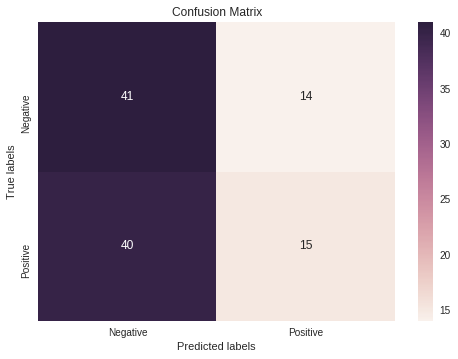

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
#cm = classification_report(y_test, y_pred_lstm)
sns.heatmap(confusion_matrix(Y_le, Y_pred_GE_sr1.sentiment), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

In [72]:
sequences = tokenizer.texts_to_sequences(transcript_GE['text'])
data = pad_sequences(sequences, maxlen=200)

X_tra_GE = data
X_tra_GE

array([[  0,   0,   0, ...,  26,  31, 960],
       [  0,   0,   0, ...,  17,   9, 479],
       [  0,   0,   0, ...,  23, 483, 484],
       ...,
       [  0,   0,   0, ...,   3, 143, 304],
       [  0,   0,   0, ..., 144,  34, 853],
       [  0,   0,   0, ...,   1, 381, 149]], dtype=int32)

In [73]:
Y_pred_GE_gru = model_GRU.predict(X_tra_GE)


Y_pred_GE_gru1 =  pd.DataFrame(Y_pred_GE_gru,columns=['sentiment_score'])
Y_pred_GE_gru1

Y_pred_GE_gru1.loc[ Y_pred_GE_gru1['sentiment_score'] >= 0.5, 'sentiment'] = 1
Y_pred_GE_gru1.loc[ Y_pred_GE_gru1['sentiment_score'] < 0.5, 'sentiment'] = 0
Y_pred_GE_gru1

accuracy_score(Y_le, Y_pred_GE_gru1.sentiment)

0.44545454545454544

In [76]:
Y_pred_GE_lstm = model_lstm.predict(X_tra_GE)


Y_pred_GE_lstm1 =  pd.DataFrame(Y_pred_GE_lstm,columns=['sentiment_score'])
Y_pred_GE_lstm1

Y_pred_GE_lstm1.loc[ Y_pred_GE_lstm1['sentiment_score'] >= 0.5, 'sentiment'] = 1
Y_pred_GE_lstm1.loc[ Y_pred_GE_lstm1['sentiment_score'] < 0.5, 'sentiment'] = 0
Y_pred_GE_lstm1

accuracy_score(Y_le, Y_pred_GE_lstm1.sentiment)

0.5181818181818182

[Text(0, 0.5, 'Positive'), Text(0, 1.5, 'Negative')]

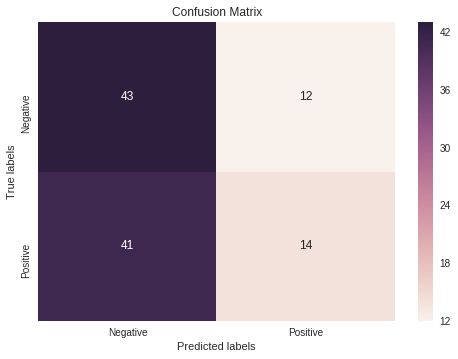

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

ax= plt.subplot()
#cm = classification_report(y_test, y_pred_lstm)
sns.heatmap(confusion_matrix(Y_le, Y_pred_GE_lstm1.sentiment), annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])